# Plotting

In [1]:
import simpy
import numpy as np
import pandas as pd
import main
import matplotlib.pyplot as plt

In [2]:
custumer_interval_lambda = 1/3
moving_time_lambda = 2
scanning_time = 0.1
paying_time = 0.2
time_to_pick_item = np.array([0.1, 0.15, 0.1, 0.1, 0.15, 0.1, 0.2])
N = np.array([100, 150, 50, 150, 80, 40, 250])
refilling_time = np.array([60, 36, 42, 42, 30, 60, 90])

employeers_range = 10
simulations = 20

results = np.zeros((employeers_range, simulations))
for n_employyers in range(1, employeers_range+1):
    for i in range(simulations):
        sim = np.array(main.run_sim(n_employyers, custumer_interval_lambda, moving_time_lambda,
                                   scanning_time, paying_time, time_to_pick_item, N, refilling_time))
        results[n_employyers-1][i] = sim.mean()


df = pd.DataFrame(results, columns=[
                    f"Run {i}" for i in range(len(results[1]))])

In [3]:
df.transpose()
mean_vals = df.mean(axis=1)
std_vals = df.std(axis=1)

In [4]:
list(mean_vals), len(mean_vals)

([1.4573802590079965,
  2.168522994254549,
  2.6184923848313586,
  2.7501630929365435,
  2.825930279342304,
  2.79308834321141,
  2.843075035998484,
  2.7833259996926496,
  2.8177362324635316,
  2.8614260887223892],
 10)

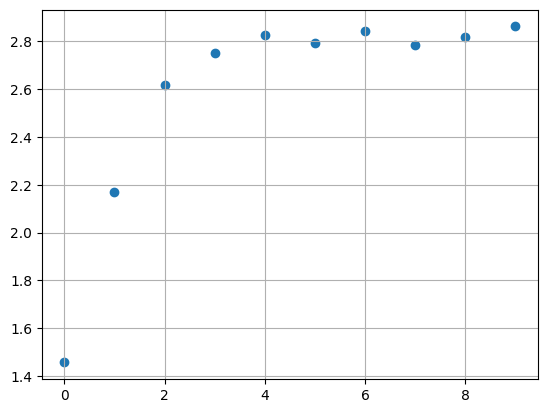

In [5]:
plt.scatter(range(len(mean_vals)), list(mean_vals))
plt.grid()


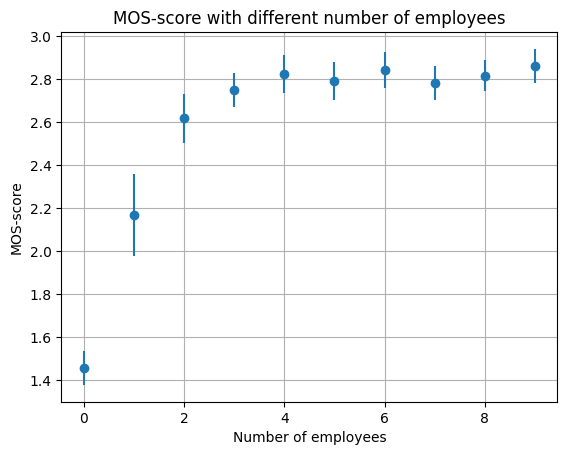

In [6]:
plt.errorbar(range(len(mean_vals)), list(mean_vals), yerr = list(std_vals), fmt="o")
plt.grid()
plt.xlabel("Number of employees")
plt.ylabel("MOS-score")
plt.title("MOS-score with different number of employees")
plt.savefig("Fig2")